# Objectifs

- Déployer la méthodologie vue pour la régression en classification.
- Commencer par la dataset `iris`, puis `digits` finir par `lfw_people`. Le tout dans `sklearn.dataset`.

In [1]:
from rich import print
from rich_rst import RestructuredText as RST

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import (
    load_iris, 
    load_digits,
)

In [5]:
from sklearn.dummy import DummyClassifier

In [6]:
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_val_score,
)

In [7]:
from sklearn.pipeline import Pipeline

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [9]:
from sklearn.metrics import confusion_matrix

# Etude de `iris`

In [10]:
resultats = dict()

## Prise en main dataset

In [11]:
res = load_iris()
type(res)

sklearn.utils.Bunch

In [12]:
dir(res)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [13]:
print(res.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes.
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    📅 July, 1988

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken
from Fisher's paper. Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.

.. topic:: References

   - Fisher, R.A. "The use of multiple measurements in taxonomic problems"
     Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
     Mathematical Statistics" (John Wiley, NY, 1950).
   - Duda, R.O., & Hart, P.E. (1973) Pattern Classification and Scene Analysis.
     (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   - Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
     Structure and Classification Rule for Recognition in Partially Exposed
     Environments".  IEEE Transactions on Pattern Analysis and Machine
     Intelligence, Vol. PAMI-2, No. 1, 67-71.
   - Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions
     on Information Theory, May 1972, 431-433.
   - See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II
     conceptual clustering system finds 3 classes in the data.
   - Many, many more ...

In [14]:
print(RST(res.DESCR))

╔═══════════════════════════════════════════════════════════════════════════════════════════╗
║                                    Iris plants dataset                                    ║
╚═══════════════════════════════════════════════════════════════════════════════════════════╝
Data Set Characteristics:

Number of Instances150 (50 in each of three classes)

Number of Attributes4 numeric, predictive attributes and the class

Attribute Information • sepal length in cm
 • sepal width in cm
 • petal length in cm
 • petal width in cm
 • class:

Iris-Setosa

Iris-Versicolour

Iris-Virginica

Summary Statisticssepal length:

4.3

7.9

5.84

0.83

0.7826

sepal width:

2.0

4.4

3.05

0.43

-0.4194

petal length:

1.0

6.9

3.76

1.76

0.9490  (high!)

petal width:

0.1

2.5

1.20

0.76

0.9565  (high!)

Missing Attribute ValuesNone

Class Distribution33.3% for each of 3 classes.

CreatorR.A. Fisher

DonorMichael Marshall (MARSHALL%PLU@io.arc.nasa.gov)

DateJuly, 1988

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken
from Fisher's paper. Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.

╔═══════════════════════════════════════════════════════════════════════════════════════════╗
║                                        References                                         ║
╚═══════════════════════════════════════════════════════════════════════════════════════════╝
 • Fisher, R.A. "The use of multiple measurements in taxonomic problems"
Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
Mathematical Statistics" (John Wiley, NY, 1950).
 • Duda, R.O., & Hart, P.E. (1973) Pattern Classification and Scene Analysis.
(Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
 • Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
Structure and Classification Rule for Recognition in Partially Exposed
Environments".  IEEE Transactions on Pattern Analysis and Machine
Intelligence, Vol. PAMI-2, No. 1, 67-71.
 • Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions
on Information Theory, May 1972, 431-433.
 • See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II
conceptual clustering system finds 3 classes in the data.
 • Many, many more ...

In [15]:
type(res.data)

numpy.ndarray

In [16]:
res.data.shape

(150, 4)

In [17]:
type(res.target)

numpy.ndarray

In [18]:
res.target.shape

(150,)

In [19]:
res.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
res.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
X_tr, X_te, y_tr, y_te = train_test_split(res.data, res.target)

## Essai de `DummyClassifier` pour avoir une base de comparaison

In [22]:
bateau = DummyClassifier(strategy="most_frequent")

In [23]:
score = cross_val_score(
    bateau, 
    X_tr, 
    y_tr,
)
resultats[bateau] = np.mean(score)

## Cross validation

### Modèles élémentaires

In [24]:
c = LogisticRegression()

In [25]:
c.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [26]:
g = GridSearchCV(
    estimator=c,
    param_grid={
        "C": [0.1, 1., 10, 100],
        "max_iter": [1000,],
    }
)
g.fit(X_tr, y_tr)
    

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10, 100], 'max_iter': [1000]})

In [27]:
resultats[g] = g.best_score_

In [28]:
c = KNeighborsClassifier()
c.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [29]:
g = GridSearchCV(
    estimator=c,
    param_grid={
        "n_neighbors": [3, 5, 7, 9],
    }
)
g.fit(X_tr, y_tr)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [30]:
resultats[g] = g.best_score_

In [31]:
c = GaussianNB()
c.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [32]:
score = cross_val_score(c, X_tr, y_tr)
resultats[c] = np.mean(score)

In [33]:
c = DecisionTreeClassifier()
c.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [34]:
score = cross_val_score(c, X_tr, y_tr)
resultats[c] = np.mean(score)

### Modèles moins élémentaires

In [35]:
c = RandomForestClassifier()
c.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [36]:
g = GridSearchCV(
    estimator=c,
    param_grid={
        "n_estimators": [50, 100, 150, 200],
    }
)
g.fit(X_tr, y_tr)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 150, 200]})

In [37]:
resultats[g] = g.best_score_

In [38]:
c = MLPClassifier()
c.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [39]:
g = GridSearchCV(
    estimator=c,
    param_grid={
        "hidden_layer_sizes": [(200, ), (100, 100), (50, 100, 50)],
        "max_iter": [1000,],
    }
)
g.fit(X_tr, y_tr)

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [(200,), (100, 100),
                                                (50, 100, 50)],
                         'max_iter': [1000]})

In [40]:
resultats[g] = g.best_score_

In [41]:
c = SVC()
c.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [42]:
g = GridSearchCV(
    estimator=c,
    param_grid={
        "C": [0.1, 1., 10.],
    }
)
g.fit(X_tr, y_tr)

GridSearchCV(estimator=SVC(), param_grid={'C': [0.1, 1.0, 10.0]})

In [43]:
resultats[g] = g.best_score_

### Conclusion

In [44]:
meilleur_score = max(resultats.values())
meilleur_modele, *_ = [
    modele for modele, score in resultats.items() if score == meilleur_score
]


In [45]:
meilleur_modele

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10, 100], 'max_iter': [1000]})

In [46]:
meilleur_modele.score(X_te, y_te)

0.9473684210526315

In [47]:
meilleur_modele.best_params_

{'C': 10, 'max_iter': 1000}

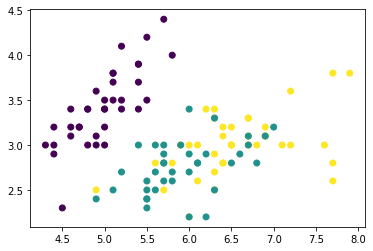

In [48]:
plt.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr) 

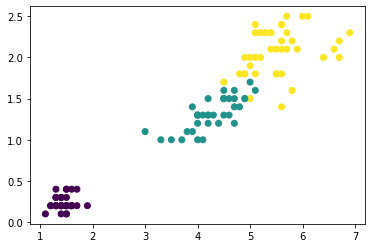

In [49]:
plt.scatter(X_tr[:, 2], X_tr[:, 3], c=y_tr) 

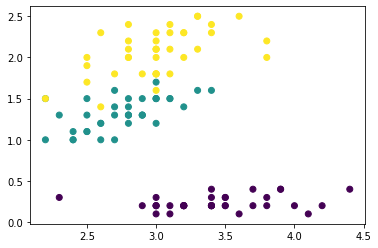

In [50]:
plt.scatter(X_tr[:, 1], X_tr[:, 3], c=y_tr) 

In [52]:
confusion_matrix(y_tr, meilleur_modele.predict(X_tr))

array([[36,  0,  0],
       [ 0, 36,  1],
       [ 0,  0, 39]])

In [53]:
confusion_matrix(y_te, meilleur_modele.predict(X_te))

array([[14,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 10]])

# Etude de digits

## Prise en main dataset

In [54]:
chiffres = load_digits()

In [55]:
X = chiffres.data
y = chiffres.target
X.shape

(1797, 64)

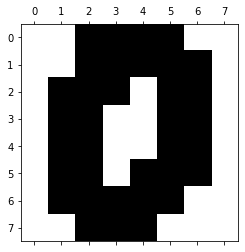

In [56]:
plt.spy(X[0].reshape((8,8)))

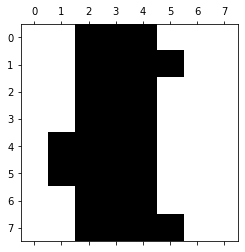

In [57]:
plt.spy(X[99].reshape((8,8)))

In [58]:
y[99]

1

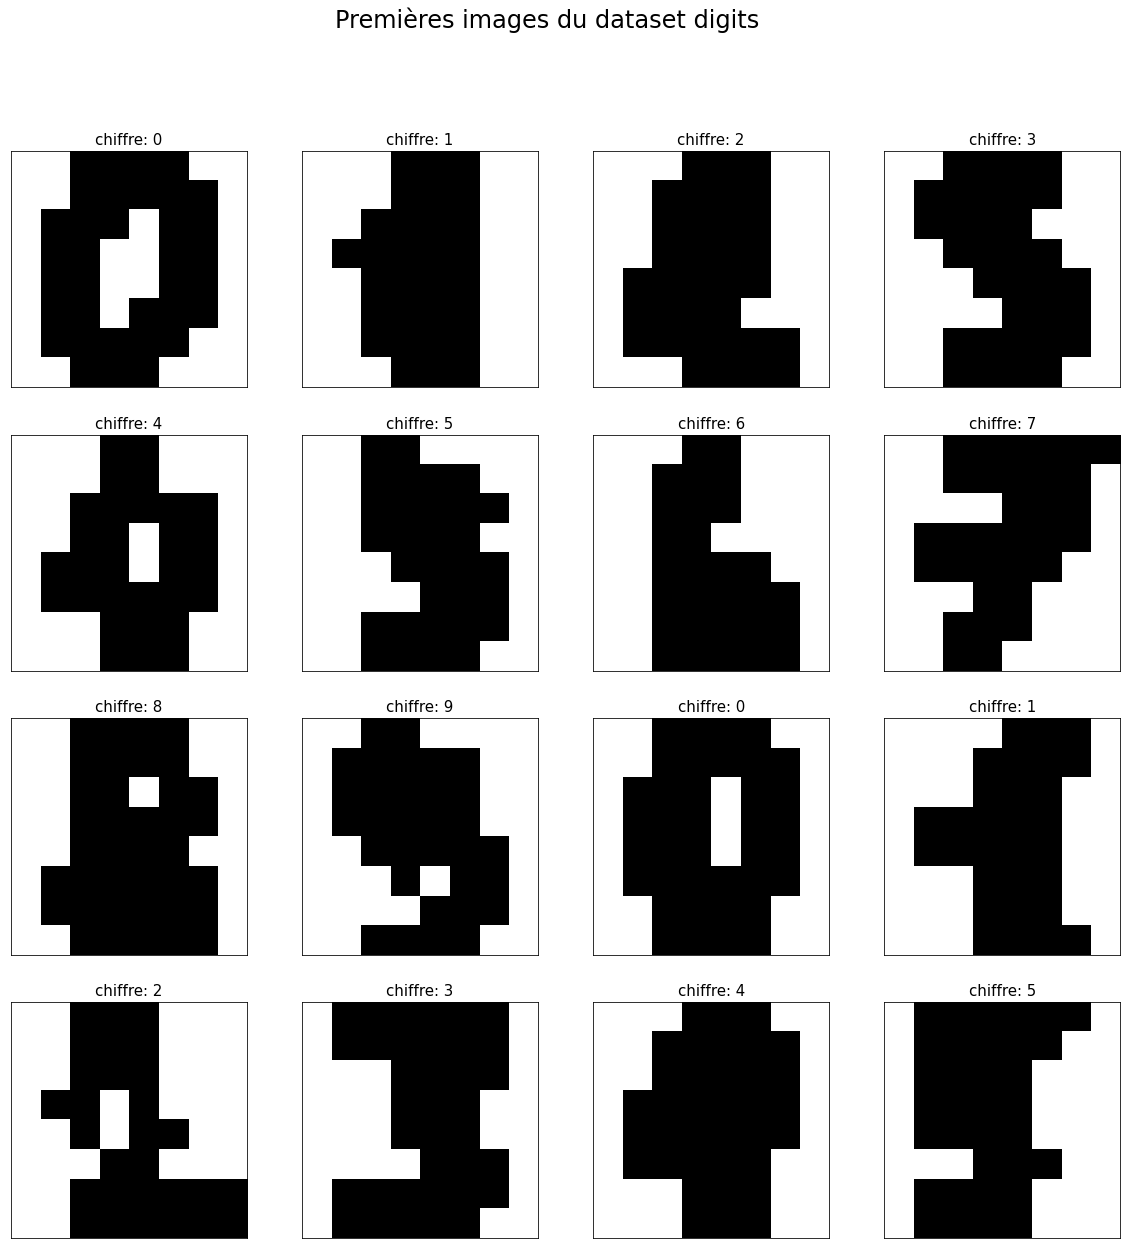

In [64]:
fig, reps = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
fig.suptitle("Premières images du dataset digits", fontsize=24)
for i, rep in enumerate(reps.flatten()):
    rep.spy(X[i].reshape((8,8)))
    rep.set_xticks([])
    rep.set_yticks([])
    rep.set_title(f"chiffre: {y[i]}", fontsize=15)